In [ ]:
import importlib
import os
import warnings

from dotenv import load_dotenv

load_dotenv("../.env")

warnings.filterwarnings("ignore", ".*does not have many workers.*")

In [ ]:
import luminar.data
import luminar.model
import luminar.features
import luminar.mongo

importlib.reload(luminar.data)
importlib.reload(luminar.model)
importlib.reload(luminar.features)
importlib.reload(luminar.mongo)

<module 'luminar.mongo' from '/nvme/projects/PrismAI/PrismAI/src/luminar/mongo.py'>

In [ ]:
from luminar.features import FeatureExtractor
from luminar.mongo import PrismaiDataset

In [ ]:
domains = {
    "Blog Authorship": {"domain": "blog_authorship_corpus"},
    "Student Essays": {"domain": "student_essays"},
    "CNN News": {"domain": "cnn_news"},
    "Euro Court Cases": {"domain": "euro_court_cases"},
    "House of Commons": {"domain": "house_of_commons"},
    "ArXiv Papers": {"domain": "arxiv_papers"},
    "Gutenberg": {"domain": "gutenberg", "lang": "en-EN"},
    "Bundestag [DE]": {"domain": "bundestag"},
    "Spiegel [DE]": {"domain": "spiegel_articles"},
}
dmap = {
    "Blog Authorship": "Blog Authorship",
    "Student Essays": "Student Essays",
    "CNN News": "CNN News",
    "Euro Court Cases": "Euro Court Cases",
    "House of Commons": "House of Commons",
    "ArXiv Papers": "ArXiv Papers",
    "Gutenberg [EN]": "Gutenberg",
    "Bundestag": "Bundestag [DE]",
    "Spiegel": "Spiegel [DE]",
}

In [ ]:
config = {
    "seed": 1337,
    "eval_split": 0.1,
    "test_split": 0.1,
    "feature_model": "gpt2",
    "synth_agent": "gpt-4o-mini",
}

In [ ]:
dataset = PrismaiDataset(
    mongo_db_connection=os.environ.get("MONGO_DB_CONNECTION"),
    database="prismai",
    collection="features_prismai",
    feature_model=config["feature_model"],
    synth_agent=config["synth_agent"],
    document_type="fulltext",
    # update_cache=True,
    **domains["CNN News"],
).load()

[PrismaiDataset] Loading Data from Cache File /nvme/.cache/luminar/features_prismai/227bbf10dbaf3a6123f872e05e7ba5d1727cf52a0415bdc070391a82dc514a95.pkl


### Feature Visualization

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from prismai_features.data import FeatureValues

In [8]:
def visualize_features(ai_features: np.ndarray):
    fig = plt.imshow(
        ai_features,
        cmap=sns.cubehelix_palette(as_cmap=True),
        vmin=min(0.0, ai_features.min()),
        vmax=max(1.0, ai_features.max()),
    )
    fig.axes.set_axis_off()
    plt.tight_layout()
    return fig

In [9]:
sample = dataset[0]

In [ ]:
ai_sample = (
    sample["samples"][0]
    if sample["samples"][0]["type"] != "source"
    else sample["samples"][1]
)
ai_features = FeatureValues(**ai_sample["features"])

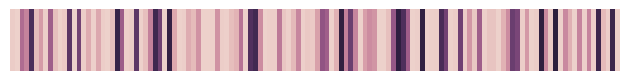

In [11]:
visualize_features(
    FeatureExtractor.Likelihood()
    .featurize(ai_features, slices=[slice(0, 128)])
    .view(1, -1)
    .numpy()
    .repeat(13, axis=0)
)
plt.savefig(
    "../figures/features/example_cnn_news_0/ai_likelihood.png",
    bbox_inches="tight",
    pad_inches=0,
)
plt.show()

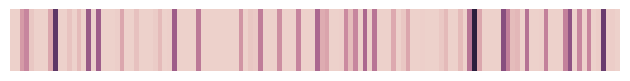

In [12]:
visualize_features(
    FeatureExtractor.LogLikelihoodLogRankRatio()
    .featurize(ai_features, slices=[slice(0, 128)])
    .view(1, -1)
    .numpy()
    .repeat(13, axis=0)
)
plt.savefig(
    "../figures/features/example_cnn_news_0/ai_lllrr.png",
    bbox_inches="tight",
    pad_inches=0,
)
plt.show()

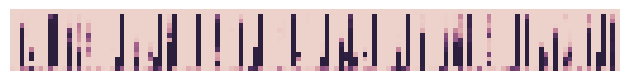

In [13]:
visualize_features(
    FeatureExtractor.IntermediateLikelihood(13)
    .featurize(ai_features, slices=[slice(0, 128)])
    .T.numpy()
)
plt.savefig(
    "../figures/features/example_cnn_news_0/ai_il.png",
    bbox_inches="tight",
    pad_inches=0,
)
plt.show()

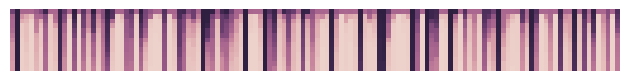

In [14]:
visualize_features(
    FeatureExtractor.TopkLikelihoodLikelihoodRatio(13)
    .featurize(ai_features, slices=[slice(0, 128)])
    .T.numpy()
)
plt.savefig(
    "../figures/features/example_cnn_news_0/ai_tkllr.png",
    bbox_inches="tight",
    pad_inches=0,
)
plt.show()

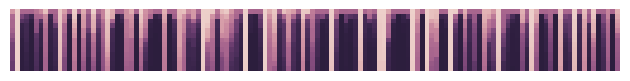

In [15]:
visualize_features(
    FeatureExtractor.LikelihoodTopkLikelihoodRatio(13)
    .featurize(ai_features, slices=[slice(0, 128)])
    .T.numpy()
)
plt.savefig(
    "../figures/features/example_cnn_news_0/ai_ltklr.png",
    bbox_inches="tight",
    pad_inches=0,
)
plt.show()

In [ ]:
human_sample = (
    sample["samples"][0]
    if sample["samples"][0]["type"] == "source"
    else sample["samples"][1]
)
human_features = FeatureValues(**human_sample["features"])[35:]

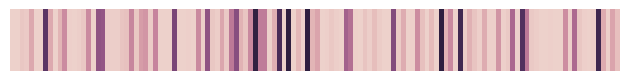

In [17]:
visualize_features(
    FeatureExtractor.Likelihood()
    .featurize(human_features, slices=[slice(0, 128)])
    .view(1, -1)
    .numpy()
    .repeat(13, axis=0)
)
plt.savefig(
    "../figures/features/example_cnn_news_0/human_likelihood.png",
    bbox_inches="tight",
    pad_inches=0,
)
plt.show()

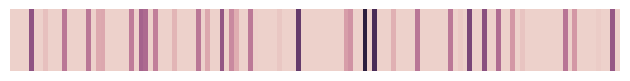

In [18]:
visualize_features(
    FeatureExtractor.LogLikelihoodLogRankRatio()
    .featurize(human_features, slices=[slice(0, 128)])
    .view(1, -1)
    .numpy()
    .repeat(13, axis=0)
)
plt.savefig(
    "../figures/features/example_cnn_news_0/human_lllrr.png",
    bbox_inches="tight",
    pad_inches=0,
)
plt.show()

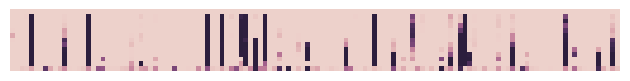

In [19]:
visualize_features(
    FeatureExtractor.IntermediateLikelihood(13)
    .featurize(human_features, slices=[slice(0, 128)])
    .T.numpy()
)
plt.savefig(
    "../figures/features/example_cnn_news_0/human_il.png",
    bbox_inches="tight",
    pad_inches=0,
)
plt.show()

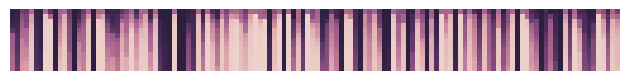

In [20]:
visualize_features(
    FeatureExtractor.TopkLikelihoodLikelihoodRatio(13)
    .featurize(human_features, slices=[slice(0, 128)])
    .T.numpy()
)
plt.savefig(
    "../figures/features/example_cnn_news_0/human_tkllr.png",
    bbox_inches="tight",
    pad_inches=0,
)
plt.show()

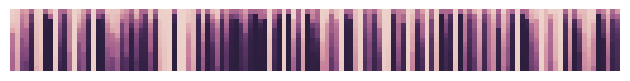

In [21]:
visualize_features(
    FeatureExtractor.LikelihoodTopkLikelihoodRatio(13)
    .featurize(human_features, slices=[slice(0, 128)])
    .T.numpy()
)
plt.savefig(
    "../figures/features/example_cnn_news_0/human_ltklr.png",
    bbox_inches="tight",
    pad_inches=0,
)
plt.show()

In [25]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("gpt2")


In [40]:
print(
    " ␣"
    + " ".join(
        tokenizer.batch_decode(
            tokenizer(
                "The Royal Family and the Middletons put up a united fashion front at the christening of Prince George at St James's Palace in London yesterday. All wore shades of chic cream or royal blue for the event with the Duchess of Cambridge, the Duchess of Cornwall, Pippa Middleton - and of course Prince George! - all sporting off-white. Zara and the Queen picked shades of navy and powder-blue and Carole Middleton wore a mixture of the two, in a navy coat and cream dress. Scroll down for video . Traditional gown: Kate co-ordinated her colour with that of her son, who was"
            ).input_ids
        )
    ).replace("  ", " ␣")
)

 ␣The ␣Royal ␣Family ␣and ␣the ␣M idd let ons ␣put ␣up ␣a ␣united ␣fashion ␣front ␣at ␣the ␣christ ening ␣of ␣Prince ␣George ␣at ␣St ␣James 's ␣Palace ␣in ␣London ␣yesterday . ␣All ␣wore ␣shades ␣of ␣chic ␣cream ␣or ␣royal ␣blue ␣for ␣the ␣event ␣with ␣the ␣Duchess ␣of ␣Cambridge , ␣the ␣Duchess ␣of ␣Cornwall , ␣P ipp a ␣Middle ton ␣- ␣and ␣of ␣course ␣Prince ␣George ! ␣- ␣all ␣sporting ␣off - white . ␣Z ara ␣and ␣the ␣Queen ␣picked ␣shades ␣of ␣navy ␣and ␣powder - blue ␣and ␣Car ole ␣Middle ton ␣wore ␣a ␣mixture ␣of ␣the ␣two , ␣in ␣a ␣navy ␣coat ␣and ␣cream ␣dress . ␣Scroll ␣down ␣for ␣video ␣. ␣Traditional ␣gown : ␣Kate ␣co - ord inated ␣her ␣colour ␣with ␣that ␣of ␣her ␣son , ␣who ␣was


In [41]:
print(
    " ␣"
    + " ".join(
        tokenizer.batch_decode(
            tokenizer(
                    "On a sun-drenched afternoon in July, the grandeur of St. James's Palace was illuminated not just by the bright rays of summer but also by the presence of the British Royal Family and the Middleton clan, all gathered to celebrate the christening of the adorable Prince George. The event, which marked a significant milestone in the young prince's life, was as much about the ceremonial blessings as it was about the dazzling array of fashion choices on display. \n\nAs the royal family arrived, a hush fell over the crowd, quickly followed by a flurry of excitement. The atmosphere was electric, filled with the kind of anticipation"
            ).input_ids
        )
    ).replace("  ", " ␣")
)

 ␣On ␣a ␣sun - d renched ␣afternoon ␣in ␣July , ␣the ␣grand eur ␣of ␣St . ␣James 's ␣Palace ␣was ␣illuminated ␣not ␣just ␣by ␣the ␣bright ␣rays ␣of ␣summer ␣but ␣also ␣by ␣the ␣presence ␣of ␣the ␣British ␣Royal ␣Family ␣and ␣the ␣Middle ton ␣clan , ␣all ␣gathered ␣to ␣celebrate ␣the ␣christ ening ␣of ␣the ␣adorable ␣Prince ␣George . ␣The ␣event , ␣which ␣marked ␣a ␣significant ␣milestone ␣in ␣the ␣young ␣prince 's ␣life , ␣was ␣as ␣much ␣about ␣the ␣ceremonial ␣blessings ␣as ␣it ␣was ␣about ␣the ␣dazzling ␣array ␣of ␣fashion ␣choices ␣on ␣display . ␣ 
 
 As ␣the ␣royal ␣family ␣arrived , ␣a ␣h ush ␣fell ␣over ␣the ␣crowd , ␣quickly ␣followed ␣by ␣a ␣flurry ␣of ␣excitement . ␣The ␣atmosphere ␣was ␣electric , ␣filled ␣with ␣the ␣kind ␣of ␣anticipation
